<a href="https://colab.research.google.com/github/emgrande/Eh_Wavelet/blob/main/Eh_Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Below are the codes to replicate the analysis of the manuscript, "Terrestrial groundwater table as a driver of salt marsh redox potential," submitted for publication in Nature Water



## Install and run the necessary libraries

Notice that depending on the user's internet connection, this can take several minutes

In [ ]:
#to read google sheets in R
install.packages("'googlesheets4'")
library(googlesheets4)

In [ ]:
#to perform wavelet transform
install.packages('biwavelet')
library(biwavelet)

In [ ]:
#To perform mutual information and entropy analysis
install.packages("infotheo")
install.packages("DescTools")
library(infotheo)
library(DescTools)

In [ ]:
# to detrend the data
install.packages("pracma")
library(pracma)
library(tidyverse)

In [ ]:
#for color scale used in the anuscript
install.packages("cmocean")
library(cmocean)

## Load the data

### These data sets are hosted in public repositories:

*   Guimond, J. (2019). St. Jones Data Compilation 2017, HydroShare, https://doi.org/10.4211/hs.8f0b5599b871457ebb47f0bac898f156.
*   Grande, Emilio, Arora, Bhavna, and Zimmer, Margaret. Subsurface redox potential and water level at the Elkhorn Slough NERR. United States: N. p., 2022. Web. doi:10.15485/1846282.
*   Grande, Emilio, Zimmer, Margaret, Seybold, Erin, and Tatariw, Corianne. Modeled sub-hourly nitrate concentrations in subsurface water across a salt marsh system in Elkhorn Slough, California. United States: N. p., 2023. Web. doi:10.15485/1987518.
*   Grande, Emilio, Visser, Ate, Zimmer, Margaret, Visser, Ate, Oerter, Erik, and Zimmer, Margaret. Stable water isotopes and tritium data from porewater at Elkhorn Slough. United States: N. p., 2023. Web. doi:10.15485/1970526.



In [ ]:
docID = '1gq6EoCk1sghoReU-iktblw0I9_K-c2TzFonNPdx8TmU'
sheetID = '178074392'
options(warn=-1)
elkhorn = read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                         docID,
                         '/export?gid=',
                         sheetID))


In [7]:
head(elkhorn)

Date.Time,Lower Marsh_50cm (mV),Lower Marsh_30cm (mV),Lower Marsh_10cm (mV),Middle Marsh_50cm (mV),Middle Marsh_30cm (mV),Middle Marsh_10cm (mV),Upper Marsh_50cm (mV),Upper Marsh_30cm (mV),Upper Marsh_10cm (mV),⋯,p_meteor,ET,precip,TGWL,WL_n1,WTemp_N1,WL_n2,WTemp_N2,WL_n3,WTemp_N3
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-03-01 08:00:00,-132.5962,-194.8364,-139.9677,-170.3183,-231.1510,-169.5022,-77.55572,-89.40897,-99.59413,⋯,0,0.02,0,2.632312,1.587533,11.91467,1.698408,12.09425,1.696825,12.10367
2020-03-01 09:00:00,-137.2095,-195.0980,-141.3355,-171.3461,-231.3930,-170.3068,-81.67613,-93.13880,-103.28347,⋯,0,0.13,0,2.632696,1.587492,11.91750,1.698358,12.09792,1.696708,12.10800
2020-03-01 10:00:00,-140.1528,-195.7083,-142.7968,-172.0692,-231.5866,-170.8511,-87.24480,-98.82222,-109.09962,⋯,0,0.17,0,2.633021,1.587508,11.92058,1.698317,12.09975,1.696708,12.11258
2020-03-01 11:00:00,-142.3663,-196.1212,-143.6511,-172.4305,-231.7284,-171.1096,-89.11692,-100.96702,-111.46771,⋯,0,0.17,0,2.633358,1.587417,11.92350,1.698408,12.10483,1.697033,12.11708
2020-03-01 12:00:00,-144.2834,-196.5122,-144.1693,-172.6407,-231.8102,-171.1452,-89.70657,-101.82232,-112.60967,⋯,0,0.18,0,2.633798,1.586758,11.92658,1.698583,12.10808,1.697858,12.12133
2020-03-01 13:00:00,-144.8008,-196.6774,-144.1363,-172.6183,-231.8393,-170.9975,-89.97855,-101.91725,-112.97034,⋯,0,0.22,0,2.634125,1.586183,11.92983,1.698692,12.11133,1.698458,12.12592


In [ ]:
#St. Jones Tidal Nr. Channel
docID = '14MRtOKYdcWv-8JQKj5l_gScpQwfxSKCDdLTW3G4wr2k'
sheetID = '0'

tidal <- read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                              docID,
                              '/export?gid=',
                              sheetID))



In [10]:
head(tidal)

Date.Time,mV10,mV13,mV22,mV35,mV50,mV60,mV75,mV85,mV100,TGWL
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-01 00:00:00,149.175,119.175,-200.600,-177.875,-196.150,-188.875,-300.700,-225.90,-227.300,NA
2017-03-01 01:00:00,143.825,101.325,-200.500,-178.175,-196.625,-188.550,-300.700,-225.60,-227.450,NA
2017-03-01 02:00:00,140.725,144.175,-200.500,-178.200,-196.600,-189.400,-300.700,-225.45,-227.525,NA
2017-03-01 03:00:00,147.650,146.300,-201.475,-179.800,-196.800,-187.375,-300.700,-225.60,-227.375,NA
2017-03-01 04:00:00,147.550,147.750,-201.025,-180.725,-196.900,-188.050,-300.475,-225.60,-227.450,NA
2017-03-01 05:00:00,148.900,150.575,-200.850,-181.475,-197.000,-181.975,-300.325,-225.60,-227.300,NA


In [ ]:
#St. Spring Neap
docID = '1lCxglecgpSJHAJFxC0ZXxM65tQeg7lpbUtYXDpH_Jy8'
sheetID = '0'

spring <- read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                              docID,
                              '/export?gid=',
                              sheetID))

In [12]:
head(spring)

Date.Time,mV4,mV7,mV16,mV29,mV39,mV49,mV59,mV69,mV79,je_54_06,je_54_08_deep,je_54_08_shallow,je_54_09,W1,W2,W4,W11
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2017-03-01 00:00:00,250.4743,79.700,-194.100,-191.400,-255.600,-273.400,-268.625,-241.600,-216.650,NA,NA,NA,NA,NA,NA,NA,NA
2017-03-01 01:00:00,253.0835,80.100,-193.900,-191.200,-255.600,-273.250,-268.900,-241.800,-216.650,NA,NA,NA,NA,NA,NA,NA,NA
2017-03-01 02:00:00,252.0730,80.375,-194.000,-191.200,-255.600,-273.250,-269.000,-241.875,-216.575,NA,NA,NA,NA,NA,NA,NA,NA
2017-03-01 03:00:00,250.2215,81.675,-193.900,-191.200,-255.375,-273.325,-269.100,-242.100,-216.800,NA,NA,NA,NA,NA,NA,NA,NA
2017-03-01 04:00:00,248.8738,82.300,-193.900,-191.125,-255.375,-273.250,-269.100,-242.300,-216.800,NA,NA,NA,NA,NA,NA,NA,NA
2017-03-01 05:00:00,247.1895,77.825,-193.675,-191.050,-255.100,-273.400,-269.250,-242.575,-216.075,NA,NA,NA,NA,NA,NA,NA,NA


## 1- continuous wavelet transform

Wavelet transform (CWT) is one of the most commonly used time-frequency analysis techniques for studying multiscale, nonstationary processes over spatial and temporal scales. CWT is obtained by decomposing the data $D(t)$ with a wavelet function $\Psi(t)$ and creating wavelet coefficients $W$ that designate the relationship amongst the wavelet function and the data:

$W_D(a,b)= \int_{-\infty}^{\infty}\Psi_{a,b}^*(t)D(t)dt$

where $t$ is time, $*$ is the complex conjugate of the wavelet function, illustrated by:

$\Psi_{a,b}^*(t)=\frac{1}{\sqrt{a}}\Psi(\frac{t-b}{a}), a>0, -\infty <b < \infty $

$a$ is the scale parameter that determines the dilation or contraction, and $b$ is the shift parameter that dictates the location of the wavelet. The flexibility of the wavelet to be stretched and translated in both time and frequency domains helps identify patterns across different time scales.

In [13]:
# Write a function to normalize the time series
normalize <- function(data){
  variance = var(data, na.rm = TRUE)
  data = (data-mean(data))/sqrt(variance)
  return(data)
}

In [15]:
#create the time series to be analyzed. Notice that we detrend and normalize the data, and make the time column into numneric. We will reconstruct the periods in a later steps
mV <- data.frame(x = as.numeric(elkhorn$Date.Time), y = ts(detrend(normalize(elkhorn$`Lower Marsh_30cm (mV)`))))

#Run the wavelet transform for the time series.
wtc.mV30_low <- wt(mV, dt = 1,mother = "morlet",sig.level = 0.95, arima.method = "CSS")
#reconstruct the period, scale, etc. (We need this step because we made the time-steps numeric earlier)
wtc.mV30_low$scale <- wtc.mV30_low$scale/4096
wtc.mV30_low$period <- wtc.mV30_low$period/4096
wtc.mV30_low$coi <- wtc.mV30_low$coi/4096

#create Time series and repeat analysis for upper marsh example
mV <- data.frame(x = as.numeric(elkhorn$Date.Time), y = ts(detrend(normalize(elkhorn$`Upper Marsh_30cm (mV)`))))
wtc.mV30_upp <- wt(mV, dt = 1,mother = "morlet",sig.level = 0.95, arima.method = "CSS")
wtc.mV30_upp$scale <- wtc.mV30_upp$scale/4096
wtc.mV30_upp$period <- wtc.mV30_upp$period/4096
wtc.mV30_upp$coi <- wtc.mV30_upp$coi/4096


#Calculate wavelet transform for the example in the st_jones sites
mV <- data.frame(x = as.numeric(tidal$Date.Time), y = ts(detrend(normalize(tidal$mV35))))
wtc.mV35 <- wt(mV, dt = 1,mother = "morlet",sig.level = 0.95, arima.method = "CSS")
wtc.mV35$scale <- wtc.mV35$scale/4096
wtc.mV35$period <- wtc.mV35$period/4096
wtc.mV35$coi <- wtc.mV35$coi/4096

#Repeat for Spring Neap
mV <- data.frame(x = as.numeric(tidal$Date.Time), y = ts(detrend(normalize(spring$mV7))))
wtc.mV7 <- wt(mV, dt = 1,mother = "morlet",sig.level = 0.95, arima.method = "CSS")
wtc.mV7$scale <- wtc.mV7$scale/4096
wtc.mV7$period <- wtc.mV7$period/4096
wtc.mV7$coi <- wtc.mV7$coi/4096


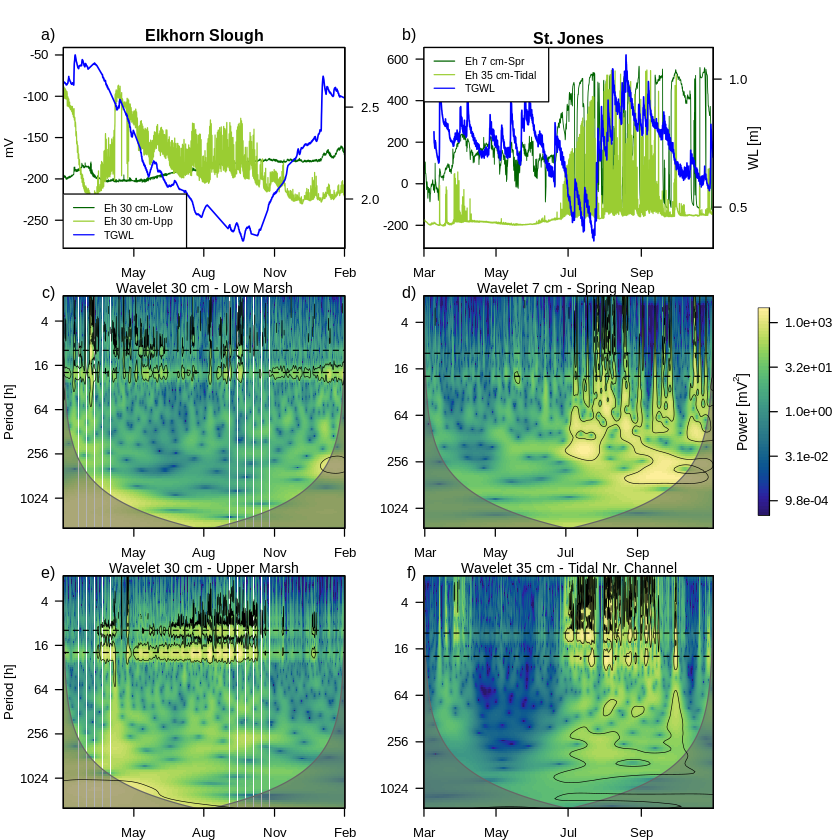

In [19]:
#set the layout
par(mfrow = c(3,2),oma = c(0, 0, 0, 1.5))
par(mar = c(2, 4, 3, 4) )
par(las= 1)

#Time series ES
plot(elkhorn$Date.Time, elkhorn$`Lower Marsh_30cm (mV)` , type = "l",
     xaxt = "n", xlab = "", xaxs = "i", ylab = "mV", lwd = 0.7,
     col = "darkgreen"
     ,ylim = c(-275,-50)
)

lines(elkhorn$Date.Time, elkhorn$`Upper Marsh_30cm (mV)`, col = 'yellowgreen')

par(new = T)

plot(elkhorn$Date.Time, elkhorn$TGWL, type = "l",
     xaxt = "n", yaxt = "n",xlab = "", xaxs = "i", ylab = "",
     col = "blue"
     , lwd = 1.3
)

axis(4, at = seq(floor(min(elkhorn$TGWL, na.rm = T)), ceiling(max(elkhorn$TGWL, na.rm = T)),
                 length.out = 5))

legend("bottomleft", legend =c("Eh 30 cm-Low", "Eh 30 cm-Upp", 'TGWL'),
       col = c("darkgreen", "yellowgreen","blue"),
       lty = 1, cex = 0.8)

t <- elkhorn$Date.Time

xaxis_e <- seq(min(t), max(t), length.out = 5)
xaxis_e <- round_date(xaxis_e, unit = "day")
xaxis1_e <- month(xaxis_e, label = T, abbr = T)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext(expression(bold("Elkhorn Slough")), side = 3, cex = 0.8, bg = "white")

mtext("a)", 2, line = 0.5, padj = -9, cex = 0.8)

# Time series for St. Jones
#plot time series for St. Jones
par(mar = c(2, 1, 3, 6.5) )
plot(spring$Date.Time, spring$mV7, type = "l",
     xaxt = "n", xlab = "", xaxs = "i", ylab = "", lwd = 0.7,
     col = "darkgreen"
     ,ylim = c(-275,620)
)
lines(tidal$Date.Time, tidal$mV35, col = 'yellowgreen')

par(new = T)

plot(tidal$Date.Time, tidal$TGWL, type = "l",
     xaxt = "n", yaxt = "n",xlab = "", xaxs = "i", ylab = "", lwd = 1.3,
     col = "blue"
)

axis(4, at = seq(floor(min(tidal$TGWL, na.rm = T)), ceiling(max(tidal$TGWL, na.rm = T)),
                 length.out = 5))
par(las = 3)
mtext("WL [m]", 4, line = 2, cex = 0.7)

par(las = 1)
legend("topleft", legend =c("Eh 7 cm-Spr", "Eh 35 cm-Tidal", "TGWL"),
       col = c("darkgreen", "yellowgreen", 'blue'),
       lty = 1, cex = 0.8)
t <- tidal$Date.Time

xaxis <- seq(min(t), max(t), length.out = 5)
xaxis <- round_date(xaxis, unit = "day")
xaxis1 <- month(xaxis, label = T, abbr = T)
axis(1, at = xaxis, labels = paste0(xaxis1))

mtext(expression(bold("St. Jones")), side = 3, cex = 0.8, bg = "white")


mtext("b)", 2, line = 0.5, padj = -9, cex = 0.8)


##


####

#Wavelet ES
col <- cmocean::cmocean('haline')(100)

par(mar = c(2, 4, 1, 4) )
par(las= 2)

plot.biwavelet(wtc.mV30_low, plot.phase = F, lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "", xaxt = "n",
               plot.cb = F, fill.cols = col)
par(las= 1)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Wavelet 30 cm - Low Marsh", side = 3, cex = 0.7, bg = "white")
abline(h = c(log2(10),log2(20)), lty = 2)

mtext("c)", 2, line = 0.5, padj = -9.5, cex = 0.8)



#Wavelet St Jones
par(mar = c(2, 1, 1, 6.5) )
par(las= 2)


plot.biwavelet(wtc.mV7, plot.phase = F,
               lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "", xlab = "",
               xaxt = "n",
               plot.cb = T, fill.cols = col)
par(las= 1)
axis(1, at = xaxis, labels = paste0(xaxis1))
mtext("Wavelet 7 cm - Spring Neap", side = 3, cex = 0.7, bg = "white")
abline(h = c(log2(10),log2(20)), lty = 2)

mtext("d)", 2, line = 0.5, padj = -9.5, cex = 0.8)

par(las= 3)
mtext(expression("Power [mV"^2*"]"), 4, line = 1.5, srt=180, cex = 0.7)



####
#Elkhorn SLough
par(mar = c(2, 4, 1, 4) )
par(las= 2)
plot.biwavelet(wtc.mV30_upp, plot.phase = F, lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "", xaxt = "n",
               plot.cb = F, fill.cols = col)
par(las= 1)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Wavelet 30 cm - Upper Marsh", side = 3, cex = 0.7, bg = "white")
abline(h = c(log2(12),log2(24)), lty = 2)

mtext("e)", 2, line = 0.5, padj = -9.5, cex = 0.8)


#St. Jones
par(las= 2)
par(mar = c(2, 1, 1, 6.5) )

plot.biwavelet(wtc.mV35, plot.phase = F,
               lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "", xlab = "",
               xaxt = "n",
               plot.cb = F, fill.cols = col)
par(las= 1)
axis(1, at = xaxis, labels = paste0(xaxis1))
mtext("Wavelet 35 cm - Tidal Nr. Channel", side = 3, cex = 0.7, bg = "white")
abline(h = c(log2(12),log2(24)), lty = 2)

mtext("f)", 2, line = 0.5, padj = -9.5, cex = 0.8)


## 2- Mutual Informtion Analysis

The mutual information ($MI$) of two random variables is a measure of the mutual dependence between the two variables. Mutual information defines how different the joint distribution of the two variables $(X, Y)$ is from the product of the marginal distributions of $X$ and $Y$:

$I(X;Y) = D_{KL}(P_{(X,Y)}||P_x \bigotimes P_y)$

Below, we calculate $MI$ between $Eh$ and several hydro-climatic variables recorded at the cite over the same period and normalize by the square root of each signal's Entropy $(H)$:
$\frac{I(X;Y)}{ \sqrt{H(X* H(Y)}}$

and $H(X) = \sum_{i=1}^n{P(x_i)logP(x_i)}$

In [ ]:
#first, we need to load the data from St. Jones (The data set used in figure 1 only contains Eh). To keep all the files, we will use a different name, "tidal," instead of st_jones
#tidal
docID = "1pogLcdtPCzvb-0t6NdrHKSzLQnJKNGqOIg9qtJ2pYaI"
sheetID = '0'

tidal = read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                           docID,
                           '/export?gid=',
                           sheetID))
nbin <- NROW(tidal)^(1/3)
MGWL <- infotheo::discretize(tidal$W2,disc="equalfreq", nbins = nbin)$X
TGWL <- infotheo::discretize(tidal$TGWL,disc="equalfreq", nbins = nbin)$X
A.Temp <- infotheo::discretize(tidal$A.Temp,disc="equalfreq", nbins = nbin)$X
RH <- infotheo::discretize(tidal$RH,disc="equalfreq", nbins = nbin)$X
tot.PAR <- infotheo::discretize(tidal$tot.PAR,disc="equalfreq", nbins = nbin)$X
precip <- infotheo::discretize(tidal$precip,disc="equalfreq", nbins = nbin)$X

mV35 <- infotheo::discretize(tidal$mV35,disc="equalfreq", nbins = nbin)$X

# Spring Neap
docID = "1CI3h5rj0j9Zu42HDlVNAFETBROztYeGxMunCONAkYZE"
sheetID = '0'

spring = read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                          docID,
                          '/export?gid=',
                          sheetID))


mV7 <- infotheo::discretize(spring$mV7,disc="equalfreq", nbins = nbin)$X

In [27]:
#run the MI, and save the results in a data frame. We show examples from the shallowest and deepest probe at each site
Mut.Inf_tidal.mv35 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                             "MGWL", "TGWL"),
                               Mutual.Inf = c(MutInf(mV35,precip)/sqrt(entropy(mV35)*entropy(precip)),
                                              MutInf(mV35,RH)/sqrt(entropy(mV35)*entropy(RH)),
                                              MutInf(mV35,tot.PAR)/sqrt(entropy(mV35)*entropy(tot.PAR)),
                                              MutInf(mV35,A.Temp)/sqrt(entropy(mV35)*entropy(A.Temp)),
                                              MutInf(mV35,MGWL)/sqrt(entropy(mV35)*entropy(MGWL)),
                                              MutInf(mV35,TGWL)/sqrt(entropy(mV35)*entropy(TGWL))))

Mut.Inf_spr.mV7 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                               "MGWL", "TGWL"),
                                 Mutual.Inf = c(MutInf(mV7,precip)/sqrt(entropy(mV7)*entropy(precip)),
                                                MutInf(mV7,RH)/sqrt(entropy(mV7)*entropy(RH)),
                                                MutInf(mV7,tot.PAR)/sqrt(entropy(mV7)*entropy(tot.PAR)),
                                                MutInf(mV7,A.Temp)/sqrt(entropy(mV7)*entropy(A.Temp)),
                                                MutInf(mV7,MGWL)/sqrt(entropy(mV7)*entropy(MGWL)),
                                                MutInf(mV7,TGWL)/sqrt(entropy(mV7)*entropy(TGWL))))

In [28]:
nbin <- NROW(elkhorn)^(1/3)

MGWL <- infotheo::discretize(X = elkhorn$WL_n1, disc="equalfreq", nbins = nbin)$X
TGWL <- infotheo::discretize(X = elkhorn$TGWL, disc="equalfreq", nbins = nbin)$X
A.Temp <- infotheo::discretize(X = elkhorn$A.Temp, disc="equalfreq", nbins = nbin)$X
RH <- infotheo::discretize(X = elkhorn$RH, disc="equalfreq", nbins = nbin)$X
tot.PAR <- infotheo::discretize(X = elkhorn$tot.PAR, disc="equalfreq", nbins = nbin)$X
precip <- infotheo::discretize(X = elkhorn$precip, disc="equalfreq", nbins = nbin)$X

## Lower Marsh
`Lower Marsh_30cm (mV)` <- infotheo::discretize(elkhorn$`Lower Marsh_30cm (mV)`, disc="equalfreq", nbins = nbin)$X

Mut.Inf_Low.mv30 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                             "MGWL", "TGWL"),
                               Mutual.Inf = c(mutinformation(`Lower Marsh_30cm (mV)`,precip)/sqrt(entropy(`Lower Marsh_30cm (mV)`)*entropy(precip)),
                                              mutinformation(`Lower Marsh_30cm (mV)`,RH)/sqrt(entropy(`Lower Marsh_30cm (mV)`)*entropy(RH)),
                                              mutinformation(`Lower Marsh_30cm (mV)`,tot.PAR)/sqrt(entropy(`Lower Marsh_30cm (mV)`)*entropy(tot.PAR)),
                                              mutinformation(`Lower Marsh_30cm (mV)`,A.Temp)/sqrt(entropy(`Lower Marsh_30cm (mV)`)*entropy(A.Temp)),
                                              mutinformation(`Lower Marsh_30cm (mV)`,MGWL)/sqrt(entropy(`Lower Marsh_30cm (mV)`)*entropy(MGWL)),
                                              mutinformation(`Lower Marsh_30cm (mV)`,TGWL)/sqrt(entropy(`Lower Marsh_30cm (mV)`)*entropy(TGWL))))

`Upper Marsh_30cm (mV)` <- infotheo::discretize(elkhorn$`Upper Marsh_30cm (mV)`, disc = 'equalfreq',nbins = nbin)$X
MGWL <- infotheo::discretize(elkhorn$WL_n3, disc="equalfreq", nbins = nbin)$X

Mut.Inf_Upp.mv30 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                             "MGWL", "TGWL"),
                               Mutual.Inf = c(mutinformation(`Upper Marsh_30cm (mV)`,precip)/sqrt(entropy(`Upper Marsh_30cm (mV)`)*entropy(precip)),
                                              mutinformation(`Upper Marsh_30cm (mV)`,RH)/sqrt(entropy(`Upper Marsh_30cm (mV)`)*entropy(RH)),
                                              mutinformation(`Upper Marsh_30cm (mV)`,tot.PAR)/sqrt(entropy(`Upper Marsh_30cm (mV)`)*entropy(tot.PAR)),
                                              mutinformation(`Upper Marsh_30cm (mV)`,A.Temp)/sqrt(entropy(`Upper Marsh_30cm (mV)`)*entropy(A.Temp)),
                                              mutinformation(`Upper Marsh_30cm (mV)`,MGWL)/sqrt(entropy(`Upper Marsh_30cm (mV)`)*entropy(MGWL)),
                                              mutinformation(`Upper Marsh_30cm (mV)`,TGWL)/sqrt(entropy(`Upper Marsh_30cm (mV)`)*entropy(TGWL))))

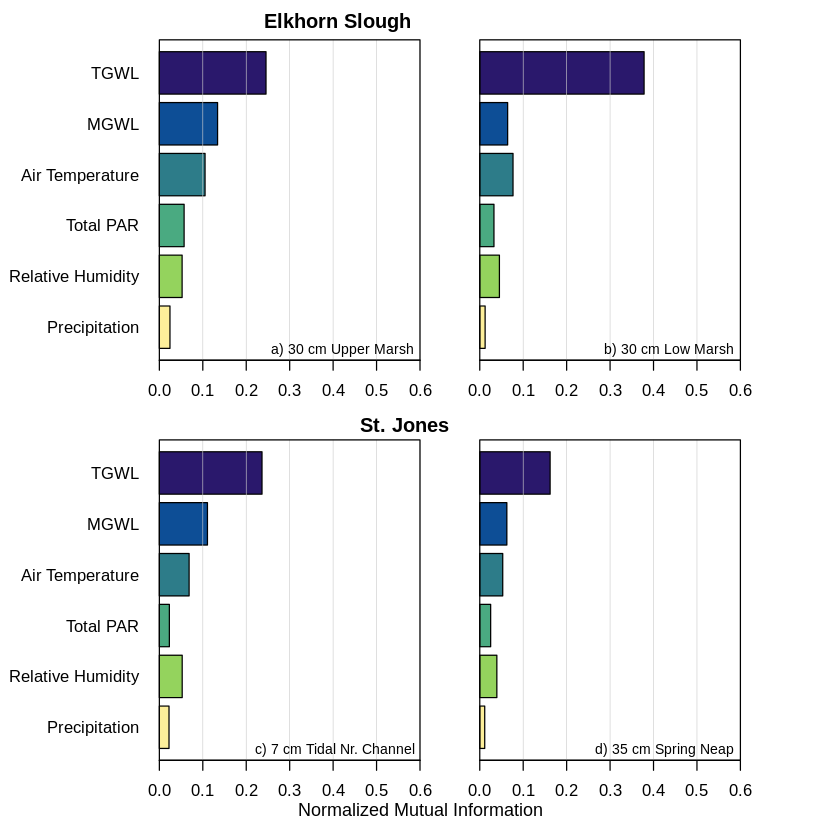

In [29]:
#PLot the results
par(mar = c(2,8,2,0))
par(mfrow = c(2,2),oma= c(2,0,0,0))
cols <- rev(cmocean::cmocean('haline')(6))

#Elkhorn
barplot(Mut.Inf_Upp.mv30$Mutual.Inf, col = cols,
        names.arg= Mut.Inf_Upp.mv30$Parameter, horiz=T, las=1, xlim = c(0,0.6))
abline(v=seq(0.1,1,0.1), col = "grey80", lwd = 0.5)
mtext("a) 30 cm Upper Marsh", side = 1, line = -1.1, adj = 0.95, cex = 0.7)
box()

par(mar = c(2,3,2,5))
barplot(Mut.Inf_Low.mv30$Mutual.Inf, col = cols, yaxt = "n",
        names.arg= Mut.Inf_Low.mv30$Parameter, horiz=T, las=1, xlim = c(0,0.6))
abline(v=seq(0.1,1,0.1), col = "grey80", lwd = 0.5)
mtext("b) 30 cm Low Marsh", side = 1, line = -1.1, adj = 0.95, cex = 0.7)
mtext(expression(bold("Elkhorn Slough")), side = 3, line = 0.2, adj = -1.9)
box()

mtext("Normalized Mutual Information", side = 1,cex = 0.9, outer = T, line = 0)

#St. Jones
par(mar = c(2,8,2,0))
barplot(Mut.Inf_spr.mV7$Mutual.Inf, col = cols,
        names.arg= Mut.Inf_spr.mV7$Parameter, horiz=T, las=1, xlim = c(0,0.6))
abline(v=seq(0.1,1,0.1), col = "grey80", lwd = 0.5)

mtext("c) 7 cm Tidal Nr. Channel", side = 1, line = -1.1, adj = 0.95, cex = 0.7)

box()

par(mar = c(2,3,2,5))
barplot(Mut.Inf_tidal.mv35$Mutual.Inf, col = cols, yaxt = "n",
        names.arg= Mut.Inf_tidal.mv35$Parameter, horiz=T, las=1, xlim = c(0,0.6))
abline(v=seq(0.1,1,0.1), col = "grey80", lwd = 0.5)
mtext("d) 35 cm Spring Neap", side = 1, line = -1.1, adj = 0.95, cex = 0.7)
mtext(expression(bold("St. Jones")), side = 3, line = 0.2, adj=-0.7)

box()